In [88]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/Users/sodell1090/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [89]:
ogutmap=pd.read_table('../qtl2/ogut_map.csv',sep=',')
ogutmap['cM']=pd.to_numeric(ogutmap['cM'])
ogutmap.head()

,SNP_ID,chr,pos,cM
0,S10_620779,10,620679,-6.4
1,S10_679925,10,679825,-6.2
2,S10_739071,10,738971,-6.0
3,S10_798217,10,798117,-5.8
4,S10_857362,10,857262,-5.6


In [91]:
ogutmap.tail()

,SNP_ID,chr,pos,cM,cM_scaled1,cM_scaled2
553,S10_149952126,10,149390236,105.6,112.0,0.003573
554,S10_150002350,10,149440460,105.8,112.2,0.003579
555,S10_150052574,10,149490684,106.0,112.4,0.003586
556,S10_150102798,10,149540908,106.2,112.6,0.003592
557,S10_150153022,10,149591132,106.4,112.8,0.003599


In [29]:
from scipy import stats

In [32]:
i=6000000
before = None
after = None
dist = 150e6
for index,row in ogutmap.iterrows():
        if row['pos']<=i:
            before=row
        if row['pos']>i and row['pos'] - i < dist:
            dist = row['pos']-i
            after = row
xpoints=[before['pos'],after['pos']]
ypoints=[before['xo_prob'],after['xo_prob']]
xpoints,ypoints

([5990024, 6022888], [6.085501293168895e-06, 6.085686465433387e-06])

In [50]:
input = 6000
df_sort = ogutmap.loc[(ogutmap['pos']-input).abs().argsort()[:2]]
max(df_sort['pos'])

679825

In [65]:
max(ogutmap['pos'])

149591132

In [127]:
x = []
y = []
start = 0 
end = 150000000
mi = min(ogutmap['pos'])
mx = max(ogutmap['pos'])
for index,row in ogutmap.iterrows():
    if row['pos'] == mi:
        xpoints=[start,row['pos']]
        ypoints=[0.0,row['cM_scaled1']]
    elif row['pos'] == mx:
        xpoints=[row['pos'],end]
        ypoints=[row['cM_scaled1'],113]
    else:
        xpoints=[last['pos'],row['pos']]
        ypoints=[last['cM_scaled1'],row['cM_scaled1']]
    slope,intercept,r_value,p_value,stderr = stats.linregress(xpoints,ypoints)
    for i in range(xpoints[0],xpoints[1],1000000):
        x.append(i)
        y.append(slope*i + intercept)
    last=row

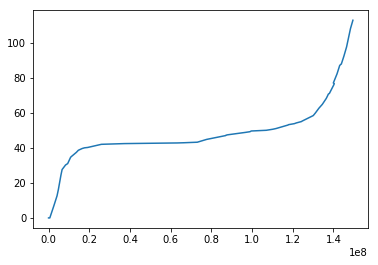

In [128]:
plot(x,y)

In [129]:
xy2 = {"pos":x,"cM":y}
recomb2 = pd.DataFrame(xy2)
recomb2['pos_Mb'] = recomb2['pos']/1000000
recomb2.tail()

,cM,pos,pos_Mb
615,111.8,149340012,149.340012
616,112.0,149390236,149.390236
617,112.2,149440460,149.440460
618,112.4,149490684,149.490684
619,112.8,149591132,149.591132


In [130]:
plast = 1
clast = 0
pdists=[]
cdists=[]
for index,row in recomb2.iterrows():
    pdist = abs(row['pos_Mb']-plast)
    cdist=abs(row['cM']-clast)
    pdists.append(pdist)
    cdists.append(cdist)
    plast=row['pos_Mb']
    clast=row['cM']
recomb2['pdists']=pdists
recomb2['cdists']=cdists
recomb2['xo_prob']=recomb2['cdists']/recomb2['pdists']   
recomb2['xo_prob2']=recomb2['xo_prob']/sum(recomb2['xo_prob'])
    
recomb2.tail()

,cM,pos,pos_Mb,pdists,cdists,xo_prob,xo_prob2
615,111.8,149340012,149.340012,0.050225,0.2,3.982081,0.002304
616,112.0,149390236,149.390236,0.050224,0.2,3.982160,0.002304
617,112.2,149440460,149.440460,0.050224,0.2,3.982160,0.002304
618,112.4,149490684,149.490684,0.050224,0.2,3.982160,0.002304
619,112.8,149591132,149.591132,0.100448,0.4,3.982160,0.002304


In [139]:
recomb['xo_prob']=recomb2['xo_prob'].astype('float64')
recomb2['xo_prob2']=recomb2['xo_prob']/sum(recomb2['xo_prob'])
sum(recomb2['xo_prob2'])

1.0000000000000013

In [68]:
x = []
y = []
start = 0 
end = 150000000
mi = min(ogutmap['pos'])
mx = max(ogutmap['pos'])
for index,row in ogutmap.iterrows():
    if row['pos'] == mi:
        xpoints=[start,row['pos']]
        ypoints=[0.2,row['cdists']]
    elif row['pos'] == mx:
        xpoints=[row['pos'],end]
        ypoints=[row['cdists'],0.2]
    else:
        xpoints=[last['pos'],row['pos']]
        ypoints=[last['cdists'],row['cdists']]
    slope,intercept,r_value,p_value,stderr = stats.linregress(xpoints,ypoints)
    for i in range(xpoints[0],xpoints[1],10000):
        x.append(i)
        y.append(slope*i + intercept)
    last=row

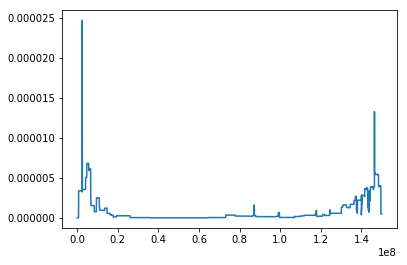

In [103]:
plot(recomb2['pos'],recomb2['xo_prob'])

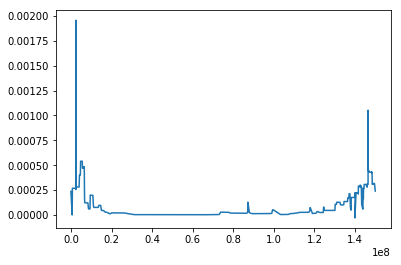

In [59]:
plot(x,ydelta)

In [90]:
ogutmap['cM_scaled1']=(ogutmap['cM']+6.4)
ogutmap['cM_scaled2']=ogutmap['cM_scaled1']/sum(ogutmap['cM_scaled1'])

In [60]:
ydelta = [i/sum(y) for i in y]
len(ydelta)

15317

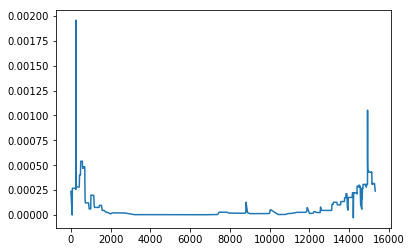

In [66]:
plot(ydelta)

In [70]:
xy2 = {"pos":x,"cdist":y}
recomb2 = pd.DataFrame(xy2)
recomb2['xo_prob']
recomb2.head()

,cdist,pos
0,0.200000,0
1,0.196778,10000
2,0.193555,20000
3,0.190333,30000
4,0.187111,40000


In [61]:
xy = {"pos":x,"xo_prob":ydelta}
recomb = pd.DataFrame(xy)
recomb.head()

,pos,xo_prob
0,0,0.000238
1,10000,0.000234
2,20000,0.000230
3,30000,0.000227
4,40000,0.000223


In [62]:
recomb.to_csv('recomb_prob_est.csv',index=False,sep='\t')

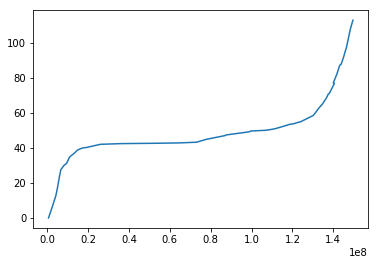

In [7]:
plot(ogutmap['pos'],ogutmap['cM_scaled1'])

In [12]:
plast = 0
clast = 0
pdists=[]
cdists=[]
for index,row in ogutmap.iterrows():
    pdist = row['pos']-plast
    cdist=row['cM_scaled1']-clast
    pdists.append(pdist)
    cdists.append(cdist)
    plast=row['pos']
    clast=row['cM_scaled1']


In [13]:
ogutmap['pdists']=pdists
ogutmap['cdists']=cdists
ogutmap['xo_prob']=ogutmap['cdists']/ogutmap['pdists']

In [234]:
ogutmap['xo_prob'] = ogutmap['xo_prob']/sum(ogutmap['xo_prob'])

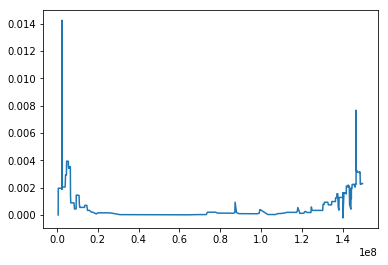

In [235]:
plot(ogutmap['pos'],ogutmap['xo_prob'])

In [251]:
first = ogutmap.ix[(abs(2000000-ogutmap['pos'])).idxmin()]
first

SNP_ID        S10_1981133
chr                    10
pos               1981033
cM                   -1.8
cM_scaled     0.000146753
cM_scaled1            4.6
cM_scaled2    0.000146753
pdists              59146
cdists                0.2
xo_prob       3.38146e-06
Name: 23, dtype: object

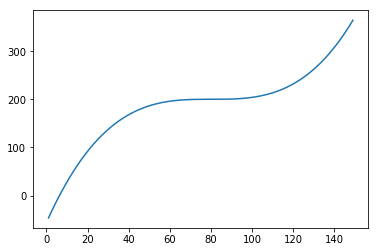

In [221]:
xdata = [i for i in range(0,int(150*1e6),int(1e4))]
for x in xdata:
    first = ogutmap.ix[(abs(x-ogutmap['pos'])).idxmin()]
    

In [67]:
[i for i in y if i<0]

[-3.7509940134169972e-07]

In [86]:
import scipy

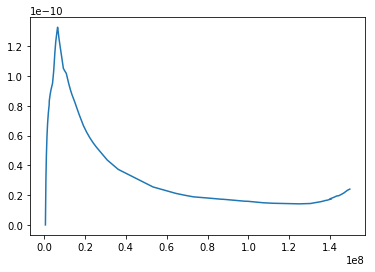

In [92]:
plot(ogutmap['pos'],ogutmap['cM_scaled']/ogutmap['pos'])

In [64]:
maplen=round(max(ogutmap['cM']) + abs(min(ogutmap['cM'])),2)
maplen

112.8

Scale cM positions from 0 to 112.8 (all positive) and then get them scaled from 0 to 1.

probabilities for breakpoints bp/cM?

In [2]:
def chrom_info(chro_num):
    """chro_num: chromosome number (int)
    Outputs:
    prior: a probability distribution function for crossover events on
    that chromosome based on chromosome length and centromere position 
    (list of floats)
    end: (int) the approximate end of the chromosome, in Mb
    """
    cent = pd.read_table('B73v4centromeres.txt',sep='\t')
    cdf = cent[cent['chr']==chro_num]
    end = int(cdf['v3chr.end'].values[0])
    centstart = int(cdf['v3start'].values[0])
    centend= int(cdf['v3end'].values[0])
    centlen = int(round(cdf['v3size'].values[0]))
    if end-centend > centstart:
        longarm = end-centend
        shortarm = centstart
    else:
        longarm = centstart
        shortarm = end-centend
    diff = longarm-shortarm
    a = [i**2 for i in list(reversed(range(0,centstart+1)))]
    c = [0.0 for i in range(centlen)]
    b = [i**2 for i in range(longarm)]
    prior = a+c+b
    if len(prior)>= end:
        prior=prior[:end]
    prior = [float(j)/sum(prior) for j in prior]
    return prior,end

In [5]:
nam_founders = ['CML322','CML333','Oh43','Oh7B','CML52','CML69','CML103','CML228','Tzi8',
 'B97','NC350','NC358','CML247','CML277','M162W','Ky21','M37W','Il14H',
 'Hp301','Ki3','Ki11','MS71','Mo18W','P39','Tx303']

parents = random.choice(nam_founders,16,replace=False)
parents

array(['Hp301', 'CML69', 'CML52', 'CML247', 'Ki3', 'CML277', 'Tzi8',
       'Il14H', 'Ky21', 'CML103', 'CML322', 'CML333', 'Ki11', 'Tx303',
       'Oh7B', 'MS71'], 
      dtype='|S6')

In [3]:
parents=['Hp301', 'CML69', 'CML52', 'CML247', 'Ki3', 'CML277', 'Tzi8',
       'Il14H', 'Ky21', 'CML103', 'CML322', 'CML333', 'Ki11', 'Tx303',
       'Oh7B', 'MS71']

In [4]:
def chrom_sim(parents,c=10):
    pop=[]
    for i in parents:
        prior,end=chrom_info(c)
        p = []
        for j in range(end+1):
            p.append(i)
        pop.append(p)
    return pop

In [5]:
pop = chrom_sim(parents)

In [8]:
len(pop[0])

150

In [14]:
def crossover(n,parents,c=10):
    rils = []
    for i in range(n):
        prior,end=chrom_info(c)
        site = [s for s in range(end)]
        f1=[]
        #randomly choose a parent to start with
        if numpy.random.random_sample() >= 0.5:
            donor = parents[0]
        else:
            donor = parents[1]
        xo = random.choice([1,2],p=[0.6,0.4])
        draw = numpy.random.choice(site,size=xo,p=prior)
        if xo == 2:
            while abs(draw[1] - draw[0]) < 40:
                draw = [draw[0],numpy.random.choice(site,p=prior)]
        draw = sorted(draw)
        #iterate through and take sections from each parent
        start = 0
        for d in draw:
            f1+=donor[start:d]
            start=d
            if donor==parents[0]:
                donor=parents[1]
            elif donor==parents[1]:
                donor=parents[0]
        f1+=donor[start:]
        rils.append(f1)
    if n==1:
        return f1
    else:
        return rils

In [15]:
def make_magic(parents,c=10,n=1):
    if len(parents)==2:
        return crossover(n,parents)
    rounds = []
    for i in range(0,len(parents),2):
        rounds.append(crossover(n,parents[i:i+2]))
    return make_magic(rounds)

In [16]:
f = [make_magic(pop) for i in range(10)]
f

[['CML322',
  'CML322',
  'CML322',
  'CML322',
  'CML322',
  'CML322',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'CML333',
  'K

In [17]:
len(f)

10

In [18]:
def make_ideotable(ril,out):
    """ Writes out file in format for drawing ideogram plots
    ril: 
    out: name of outfile (str)
    """
    txt = 'chr\tstart\tend\tdonor\n'
    count=1
    for j in ril:
        locs = locations(j)
        txt+='{0}\t{1}\t{2}\t{3}\n'.format(count,50.07*1e6,51.81*1e6,'Cent')
        for l in locs:
            txt+='{0}\t{1}\t{2}\t{3}\n'.format(count,l[1],l[2],l[3])
        count+=1
    with open(out,'w') as outfile:
        outfile.write(txt)

In [19]:
def locations(r,c=10):
    locs=[]
    last = r[0]
    counter = 0
    for i in range(len(r)):
        if r[i] != last:
            start = i
            locs.append([c,counter*1e6,(start*1e6)-1,last])
            counter=start
            last = r[i]
    locs.append([c,start*1e6,len(r)*1e6,last])
    return locs

In [29]:
locations(f[0])

[[10, 0.0, 5999999.0, 'CML322'],
 [10, 6000000.0, 82999999.0, 'CML333'],
 [10, 83000000.0, 103999999.0, 'Ki3'],
 [10, 104000000.0, 114999999.0, 'CML277'],
 [10, 115000000.0, 129999999.0, 'CML247'],
 [10, 130000000.0, 137999999.0, 'Ki11'],
 [10, 138000000.0, 143999999.0, 'MS71'],
 [10, 144000000.0, 150000000.0, 'Oh7B']]

In [32]:
def make_outfile(ril,out):
    """ Writes out file in format for drawing ideogram plots
    ril: 
    out: name of outfile (str)
    """
    txt = 'sample\tchr\tstart\tend\tdonor\n'
    count=1
    for j in ril:
        locs = locations(j)
        #txt+='{0}\t{1}\t{2}\t{3}\n'.format(count,50.07*1e6,51.81*1e6,'Cent')
        for l in locs:
            txt+='{0}\t{1}\t{2}\t{3}\t{4}\n'.format('M'+str(count),l[0],int(l[1]),int(l[2]),l[3])
        count+=1
    with open(out,'w') as outfile:
        outfile.write(txt)

In [20]:
make_ideotable(f,'MAGICSim3.txt')

In [34]:
make_outfile(f,'Actual_MAGIC1.txt')

In [24]:
sample_count=10
"""
Demonstrates plotting chromosome ideograms and genes (or any features, really)
using matplotlib.
1) Assumes a file from UCSC's Table Browser from the "cytoBandIdeo" table,
saved as "ideogram.txt". Lines look like this::
    #chrom  chromStart  chromEnd  name    gieStain
    chr1    0           2300000   p36.33  gneg
    chr1    2300000     5300000   p36.32  gpos25
    chr1    5300000     7100000   p36.31  gneg
2) Assumes another file, "ucsc_genes.txt", which is a BED format file
   downloaded from UCSC's Table Browser. This script will work with any
   BED-format file.
"""
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.collections import BrokenBarHCollection


# Here's the function that we'll call for each dataframe (once for chromosome
# ideograms, once for genes).  The rest of this script will be prepping data
# for input to this function
#

def chromosome_collections(df, y_positions, height,  **kwargs):
    """
    Yields BrokenBarHCollection of features that can be added to an Axes
    object.
    Parameters
    ----------
    df : pandas.DataFrame
        Must at least have columns ['chrom', 'start', 'end', 'color']. If no
        column 'width', it will be calculated from start/end.
    y_positions : dict
        Keys are chromosomes, values are y-value at which to anchor the
        BrokenBarHCollection
    height : float
        Height of each BrokenBarHCollection
    Additional kwargs are passed to BrokenBarHCollection
    """
    del_width = False
    if 'width' not in df.columns:
        del_width = True
        df['width'] = df['end'] - df['start']
    for chrom, group in df.groupby('chrom'):
        print chrom
        yrange = (y_positions[chrom], height)
        xranges = group[['start', 'width']].values
        yield BrokenBarHCollection(
            xranges, yrange, facecolors=group['colors'], **kwargs)
    if del_width:
        del df['width']
        
# Height of each ideogram
chrom_height = 1

# Spacing between consecutive ideograms
chrom_spacing = 1

# Height of the gene track. Should be smaller than `chrom_spacing` in order to
# fit correctly
gene_height = 0.4

# Padding between the top of a gene track and its corresponding ideogram
gene_padding = 0.1

# Width, height (in inches)
figsize = (10, 10)

# Decide which chromosomes to use ***### EDIT HERE for no. of RILS ###***
chromosome_list = [i for i in range(1, sample_count+1)]

# Keep track of the y positions for ideograms and genes for each chromosome,
# and the center of each ideogram (which is where we'll put the ytick labels)
ybase = 0
chrom_ybase = {}
gene_ybase = {}
chrom_centers = {}

for chrom in chromosome_list[::-1]:
    chrom_ybase[chrom] = ybase
    chrom_centers[chrom] = ybase + chrom_height / 2.
    gene_ybase[chrom] = ybase - gene_height - gene_padding
    ybase += chrom_height + chrom_spacing
    
    
# Read in file from output of make_ideogram()
ideo = pd.read_table(
    'MAGICSim3.txt',
    skiprows=1,
    names=['chrom', 'start', 'end', 'donor']
)

# Filter out chromosomes not in our list
ideo = ideo[ideo.chrom.apply(lambda x: x in chromosome_list)]
ideo['end'] = pd.to_numeric(ideo['end'])
ideo['start']=pd.to_numeric(ideo['start'])
# Add a new column for width
ideo['width'] = ideo.end - ideo.start

color_lookup = {'Cent': [0.0, 0.0, 0.0],
 'B73': [0.4, 0.4, 0.4],
 'B97': [0.47, 0.53, 0.98],
 'CML103': [0.58, 0.52, 0.2],
 'CML228': [0.13, 0.7, 0.43],
 'CML247': [0.38, 0.1, 0.56],
 'CML277': [0.68, 0.78, 0.87],
 'CML322': [0.45, 0.09, 0.07],
 'CML333': [0.41, 0.55, 0.37],
 'CML52': [0.72, 0.69, 0.3],
 'CML69': [0.71, 0.24, 0.01],
 'Hp301': [0.42, 0.86, 0.76],
 'Il14H': [0.66, 0.43, 0.64],
 'Ki11': [0.82, 0.63, 0.12],
 'Ki3': [0.89, 0.69, 0.79],
 'Ky21': [0.74, 0.19, 0.9],
 'M162W': [0.77, 0.71, 0.79],
 'M37W': [0.27, 1.0, 0.89],
 'MS71': [0.74, 0.88, 0.13],
 'Mo18W': [0.4, 0.96, 0.25],
 'NC350': [0.92, 0.76, 0.09],
 'NC358': [0.22, 0.98, 0.98],
 'Oh43': [0.58, 0.96, 0.87],
 'Oh7B': [0.23, 0.22, 0.86],
 'P39': [0.28, 0.21, 0.97],
 'Tx303': [0.12, 0.68, 0.75],
 'Tzi8': [0.83, 0.48, 0.87]}

In [25]:
def make_legend(parents):
    legend = []
    for p in parents:
        pcolor=color_lookup[p]
        legend+=[Line2D([0],[0],color=pcolor,lw=4,label=p)]
    legend+=[Line2D([0],[0],color=(0.0,0.0,0.0),lw=4,label='Cent')]
    return legend

1
2
3
4
5
6
7
8
9
10


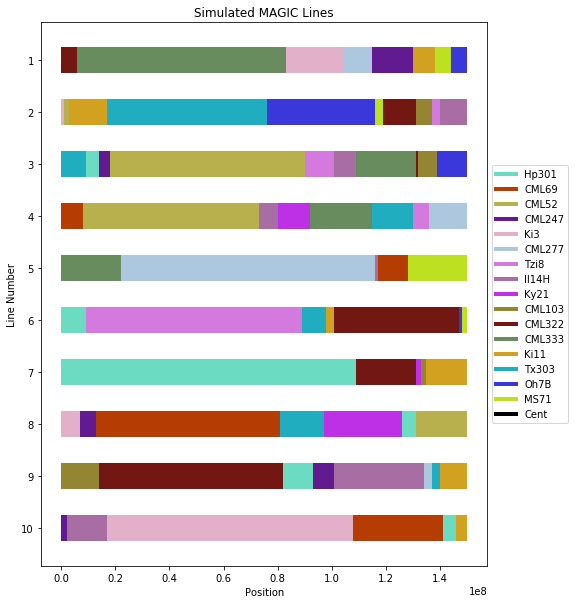

In [37]:
# Add a new column for colors
ideo['colors'] = ideo['donor'].apply(lambda x: color_lookup[x])

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Now all we have to do is call our function for the ideogram data...
#print("adding ideograms...")
for collection in chromosome_collections(ideo, chrom_ybase, chrom_height):
    ax.add_collection(collection)

# Axes tweaking
ax.set_yticks([chrom_centers[i] for i in chromosome_list])
ax.set_yticklabels(chromosome_list)
ax.axis('tight')
ax.set_xlabel('Position')
ax.set_ylabel('Line Number')
ax.set_title('Simulated MAGIC Lines')
legend(ideo['colors'],loc='lower right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis

legend_elements = make_legend(parents)

#[Line2D([0], [0], color=(0.4, 0.4, 0.4), lw=4,label='B73'),
#Line2D([0], [0], color=(0.58, 0.96, 0.87), lw=4,label='Oh43')]
ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,0.5))

plt.show()
plt.savefig("MAGICimage.png")